# Autoencoder

credit: https://blog.keras.io/building-autoencoders-in-keras.html 

https://github.com/nlintz/TensorFlow-Tutorials/blob/master/06_autoencoder.ipynb

The Keras blog introduces autoencoder and has source code written in Keras. The code from `nlintz` deals with a special de-noising autoencoder that takes in corrupted images and recovers them.

What is strange is that Keras takes 50 epochs to reach a fairly good outcome. However with TensorFlow it took me a lot of epochs to reach a good result (~ 4000). I guess it's something to do with intialization. 

If you have any suggestions please feel free to point out. 

In [ ]:
# Import modules
% matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
# Load data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

In [ ]:
# We implement a one-layer encoder and a one-layer decoder. The coded message has dimension 32. The input mnist images are
# dimension 784 vectors.
encoding_dim = 32
input_dim = 784

init_max = 4 * np.sqrt(6. / (encoding_dim + input_dim))

# Define one-layer encoder
x = tf.placeholder(tf.float32, [None, input_dim], name='x')
W_encode = tf.Variable(tf.random_uniform([input_dim, encoding_dim], minval=-init_max, maxval=init_max))
b_encode = tf.Variable(tf.zeros([encoding_dim, ]))
encoded_input = tf.nn.relu(tf.matmul(x, W_encode) + b_encode)

# Define one-layer decoder
W_decode = tf.transpose(W_encode)
b_decode = tf.Variable(tf.zeros([input_dim, ]))
decoded_input = tf.nn.sigmoid(tf.matmul(encoded_input, W_decode) + b_decode)

# Define loss function and optimizer. Set sum square error and AdaDelta optimizer. For prediction we add another node.
loss = tf.reduce_sum(tf.pow(decoded_input - x, 2))
op = tf.train.AdadeltaOptimizer().minimize(loss)
prediction = decoded_input

# data for trianing. data_test for testing our trained autoencoder.
data = mnist.train.images
data_test = mnist.test.images
num_samples = data.shape[0]
batch_size = 50

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epoch = 0
    l = sess.run([loss], feed_dict = {x: data})
# To achieve good outcome I didn't use specified number of epochs, but specify the expected total loss and the training run.
# Each epoch returns a total loss on the training data.
    while l[0] > 1e6:
        epoch = epoch + 1
        for i in range(num_samples // batch_size):
            feed_in = data[i * batch_size:(i + 1) * batch_size, :]
            sess.run([op], feed_dict={x: feed_in})
        l = sess.run([loss], feed_dict={x: data})
        print('epoch {}, loss {}'.format(epoch, l))
    test_output = sess.run([prediction], feed_dict={x: data_test})
    print('Optimization complete.')

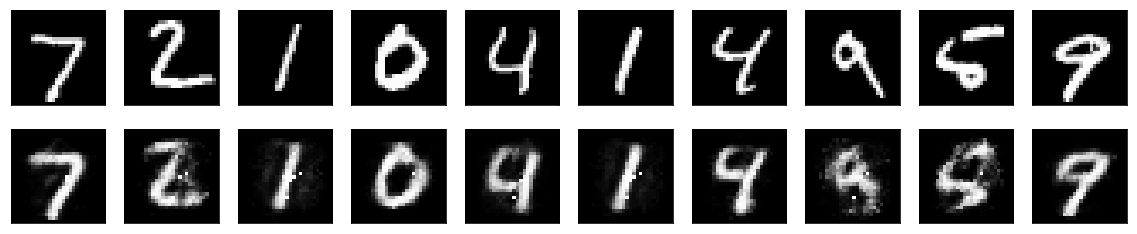

In [37]:
# display the test output. This block of code is excerpted from the code piece from Keras blog. 
test_output = np.array(test_output)
test_output = np.squeeze(test_output, 0)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_test[i, :].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_output[i, :].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()